In [131]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [132]:
df_environment = pd.read_csv("datasets/environment_mex.csv")
df_environment.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [133]:
# Country Name, Country ISO3 and Indicator Code are unnecessary columns
df_environment.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1, inplace=True)

# Also row 0 is not necessary
df_environment.drop([0], inplace=True)

df_environment


,Year,Indicator Name,Value
1,2018,Agricultural land (% of land area),54.9864965662697
2,2017,Agricultural land (% of land area),55.024048972453
3,2016,Agricultural land (% of land area),54.0096195889812
4,2015,Agricultural land (% of land area),53.0939581779367
5,2014,Agricultural land (% of land area),52.1654363538157
...,...,...,...
3450,2003,People using safely managed sanitation service...,19.98947425
3451,2002,People using safely managed sanitation service...,18.09879201
3452,2001,People using safely managed sanitation service...,17.96506537
3453,2000,People using safely managed sanitation service...,17.82838677


## I want to use the indicator name in different columns

In [134]:
pivot1 = pd.pivot_table(df_environment, index="Year", columns="Indicator Name", values="Value")
pivot1

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population living in areas where elevation is below 5 meters (% of total population),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,196513.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,224915.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,220300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,245600.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,250100.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,84.8,54.7,92.4,100.000000,7.180328,8.114000e+10,6.980319,7.888000e+10,1.562280,1.765000e+10,...,14.500533,1883689.875,NaN,671599.975586,2.491460,NaN,NaN,NaN,NaN,13.981198
2018,84.8,55.9,92.1,99.500000,7.079053,8.424000e+10,6.886388,8.195000e+10,1.554488,1.850000e+10,...,14.500533,1950433.625,NaN,654250.000000,2.972464,NaN,NaN,NaN,NaN,NaN
2019,84.9,57.6,91.7,99.599998,7.586552,9.331000e+10,7.395842,9.097000e+10,1.510898,1.858000e+10,...,14.491590,NaN,NaN,653869.995117,2.238457,NaN,NaN,NaN,NaN,NaN


In [135]:
# I know the number of rows and columns from the previos table, but I can check the number of columns with the next code:
pivot1.shape[1]

129

## Now it's easier to check columns.
Considering that there are 129 columns, I think it's a good idea to select the ones that I want to analyze and create a new dataframe with them.

In [136]:
# Check the name of the columns
pivot1.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted net savings, including particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       ...
       'Terrestrial protected areas (% of total land area)',
       'Total fisheries production (metric tons)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of C

In [137]:
# There are lots of missing values. Let's count them:

missing_values_count = pivot1.isnull().sum()
missing_values_count

Indicator Name
Access to clean fuels and technologies for cooking (% of population)                                41
Access to clean fuels and technologies for cooking, rural (% of rural population)                   41
Access to clean fuels and technologies for cooking, urban (% of urban population)                   41
Access to electricity (% of population)                                                             33
Adjusted net savings, excluding particulate emission damage (% of GNI)                              20
                                                                                                    ..
Urban land area (sq. km)                                                                            59
Urban land area where elevation is below 5 meters (% of total land area)                            59
Urban land area where elevation is below 5 meters (sq. km)                                          59
Urban population living in areas where elevation is below 

Now I can make a correlation heat map to find interesting relationships between values

### I'll save this code as a template for future uses

    correlations = pd.concat([pivot1["Adjusted savings: net national savings (current US$)"], pivot1["Agricultural land (% of land area)"], pivot1["Aquaculture production (metric tons)"]], axis=1 )
    corrmat = correlations.corr()
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corrmat, vmax=.8, square=True)



In [138]:
# I'll save this table so I can upload it to Kaggle :D
pivot1.to_csv("datasets/WB_MX_Environment_indicators.csv")


# Total greenhouse gas emissions (% change from 1990)


In [139]:
hist_ = pivot1['Total greenhouse gas emissions (% change from 1990)']
hist_.dropna()
pivot1['Total greenhouse gas emissions (% change from 1990)'].describe()

count    22.000000
mean     18.663572
std      12.637721
min       0.100095
25%       8.142528
50%      15.782376
75%      30.318425
max      40.103562
Name: Total greenhouse gas emissions (% change from 1990), dtype: float64

In [140]:
hist_.dropna()

Year
1991     2.230696
1992     0.100095
1993     1.612875
1994     5.276677
1995     4.413669
1996     7.822185
1997     9.103557
1998    40.103562
1999    12.080582
2000    16.662619
2001    10.889295
2002    14.879791
2003    21.761505
2004    14.902133
2005    29.779924
2006    29.947677
2007    30.793752
2008    30.358521
2009    31.308052
2010    30.198139
2011    32.117767
2012    34.255506
Name: Total greenhouse gas emissions (% change from 1990), dtype: float64

<AxesSubplot:ylabel='Frequency'>

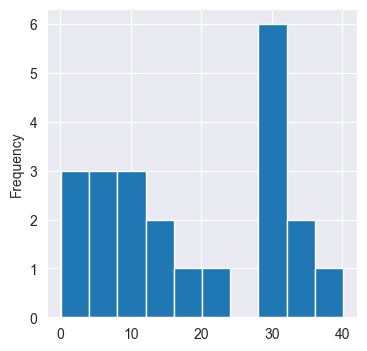

In [141]:
hist_.plot.hist(figsize=(4,4))


<AxesSubplot:xlabel='Year'>

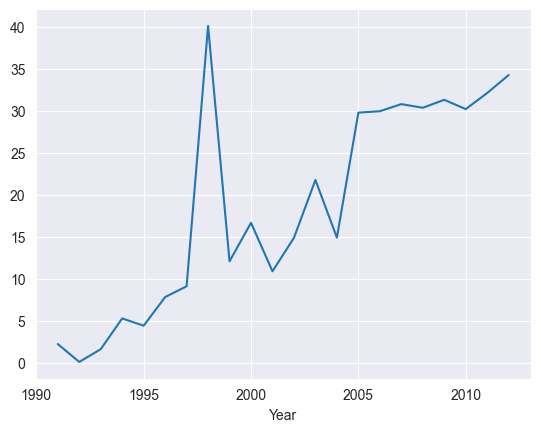

In [142]:
hist_.plot.line()

**What happened between 1995 and 2000?**
I'll try to understand how it was calculated.

In [143]:
# Filter all CO2 and greenhouse gas related columns
df_co2 = pivot1.filter(like="CO2", axis=1)
df_greenhouse = pivot1.filter(like="greenhouse", axis=1)
df_full = pd.concat([df_co2, df_greenhouse], axis=1)

# Remove duplicated columns
df_full = df_full.loc[:,~df_full.columns.duplicated()].copy()
df_full.columns

Index(['Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)',
       'HFC gas emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 eq

In [155]:
nan_values = df_full.isnull().sum()
nan_values

Indicator Name
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                      32
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)                32
CO2 emissions (kg per 2015 US$ of GDP)                                                       33
CO2 emissions (kg per 2017 PPP $ of GDP)                                                     32
CO2 emissions (kg per PPP $ of GDP)                                                          32
CO2 emissions (kt)                                                                           32
CO2 emissions (metric tons per capita)                                                       32
CO2 emissions from gaseous fuel consumption (% of total)                                      5
CO2 emissions from gaseous fuel consumption (kt)                                              5
CO2 emissions from liquid fuel consumption (% of total)                                       5
CO2 emissions from liquid

In [144]:
total_co2 = df_co2["Total greenhouse gas emissions (kt of CO2 equivalent)"].dropna()
# Calculate the percentage of change from 1990.
for x in total_co2:
    print(((x - total_co2[0])/total_co2[0])*100)

0.0
4.667081518357187
5.396388967213694
9.70752955818295
16.32607251720995
11.233355291303802
16.00995826365127
21.712510513087246
27.920344221569636
25.209707225711757
31.98257379822651
32.12196335854859
34.185445390284755
40.12695008653541
43.02924582879601
48.62725210990988
53.829498385967646
56.93091990121344
57.95146417528786
55.586809539320214
60.02737352695233
65.0205278663659
67.29806972425338
63.902919842874915
61.64529511998283
66.03608905861083
67.76602364654636
67.1686311352677
62.850031113876796
62.75544371305239


**The results are very different from the calculation in the table!**

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

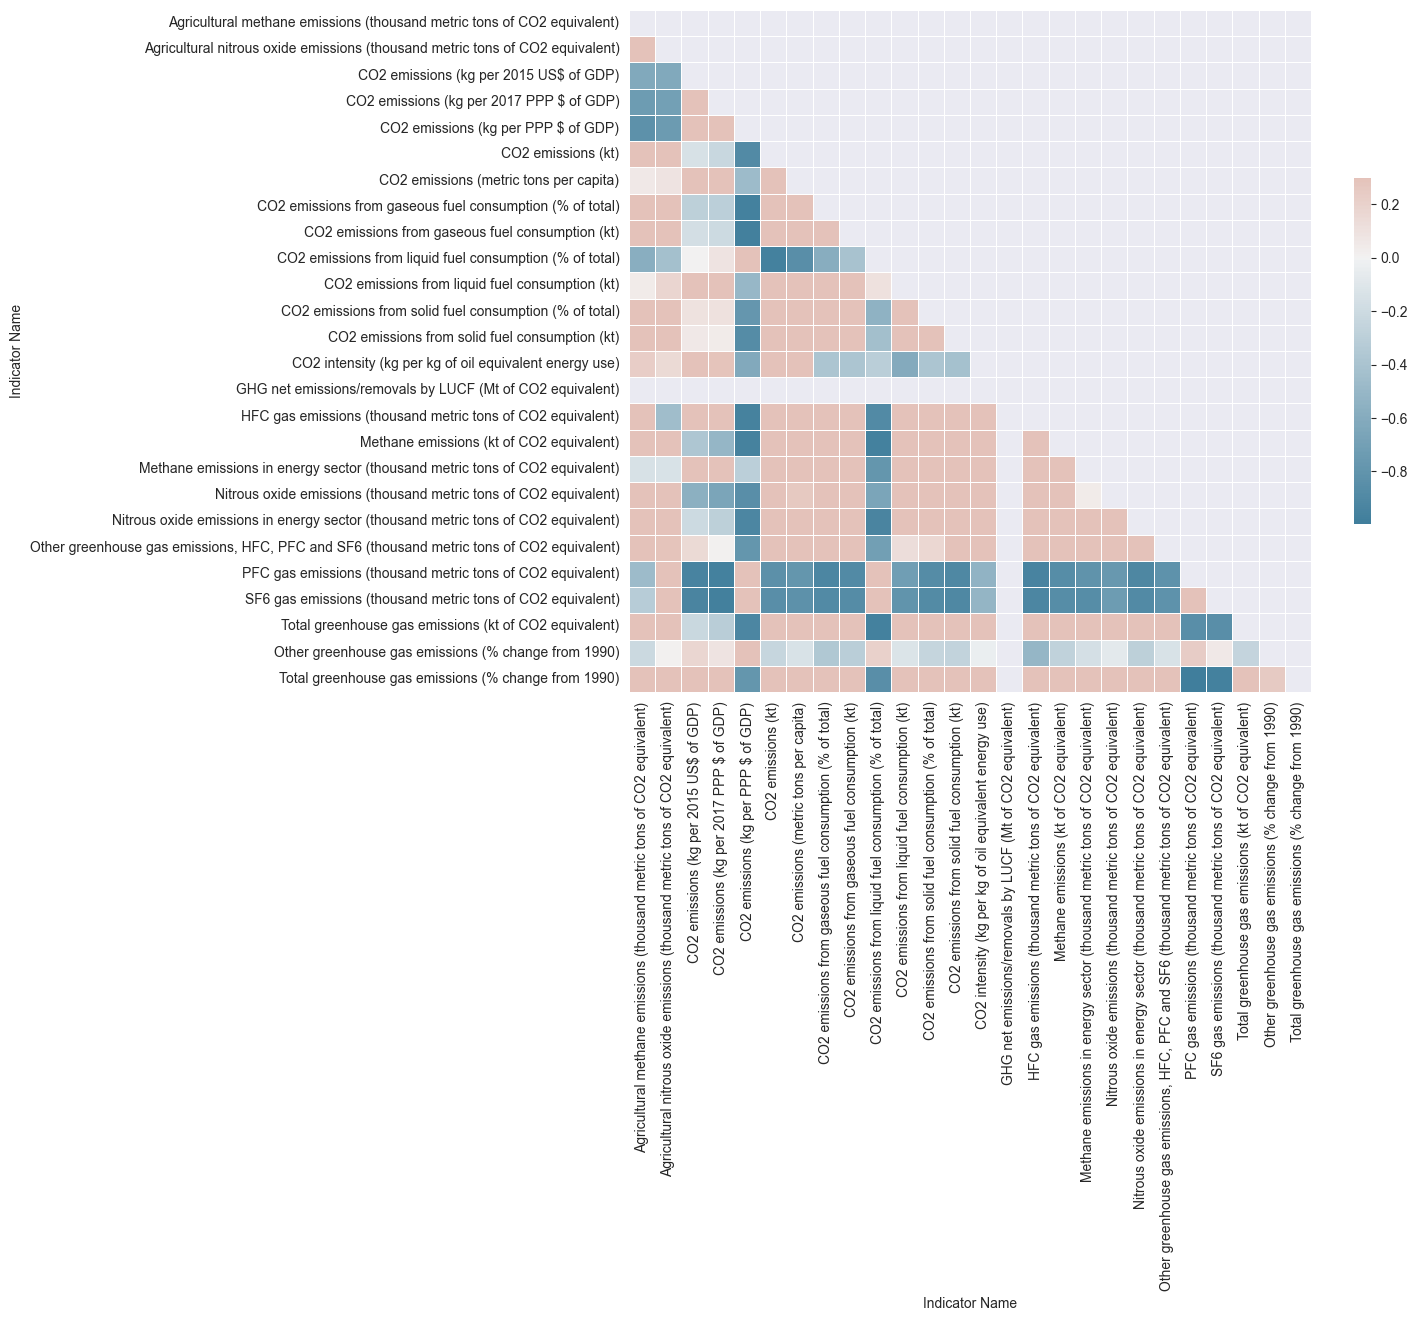

In [145]:
# Try with a diagonal correlation matrix

# Compute correlation matrix
corr = df_full.corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Greenhouse gas emissions by sector in Mexico
million metric tonnes of carbon dioxide equivalents

First, I'll check for the most CO2 eq contaminant sectors in Mexico, so I can limit the investigation to the most contaminant ones and try to find a correlation within those sectors and the extreme percentage of change between 1995 and 2000

In [146]:
df_ghge = pd.read_csv("datasets/ghg-emissions-by-sector.csv")
df_ghge.columns


Index(['Entity', 'Code', 'Year', 'Agriculture', 'Land-use change and forestry',
       'Waste', 'Industry', 'Manufacturing and construction', 'Transport',
       'Electricity and heat', 'Buildings', 'Fugitive emissions',
       'Other fuel combustion', 'Aviation and shipping'],
      dtype='object')

In [147]:
# I can pivot this table to use Countries as columns and years as index
df_ghge_mexico = df_ghge.query("Entity == 'Mexico'")
df_ghge_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)
df_ghge_mexico

/tmp/ipykernel_5601/315749359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ghge_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)


,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
3510,1990,8.878000e+07,2.454000e+07,8.020000e+06,1.326000e+07,5.355000e+07,8.612000e+07,9.451000e+07,2.325000e+07,2.910000e+07,5.160000e+06,5.330000e+06
3511,1991,8.706000e+07,2.454000e+07,8.690000e+06,1.367000e+07,5.228000e+07,9.216000e+07,1.069300e+08,2.428000e+07,3.009000e+07,5.340000e+06,5.550000e+06
3512,1992,8.640000e+07,2.454000e+07,9.350000e+06,1.389000e+07,5.196000e+07,9.247000e+07,1.079100e+08,2.622000e+07,2.983000e+07,5.390000e+06,6.140000e+06
3513,1993,8.789000e+07,2.454000e+07,1.521000e+07,1.490000e+07,5.025000e+07,9.461000e+07,1.145400e+08,2.671000e+07,3.120000e+07,5.420000e+06,7.230000e+06
3514,1994,8.774000e+07,2.454000e+07,1.583000e+07,1.614000e+07,5.111000e+07,1.004400e+08,1.308600e+08,2.796000e+07,3.215000e+07,5.110000e+06,9.650000e+06
3515,1995,8.600000e+07,2.454000e+07,1.645000e+07,1.383000e+07,4.953000e+07,9.217000e+07,1.223100e+08,2.797000e+07,3.337000e+07,5.260000e+06,9.490000e+06
3516,1996,8.493000e+07,2.400000e+07,1.700000e+07,1.707000e+07,5.510000e+07,9.455000e+07,1.277200e+08,2.773000e+07,3.629000e+07,5.680000e+06,9.360000e+06
3517,1997,8.551000e+07,2.424000e+07,1.695000e+07,1.801000e+07,5.521000e+07,9.868000e+07,1.419100e+08,2.736000e+07,3.929000e+07,6.060000e+06,9.810000e+06
3518,1998,8.743000e+07,3.266000e+07,1.692000e+07,1.855000e+07,5.662000e+07,1.013200e+08,1.592600e+08,2.843000e+07,3.936000e+07,6.040000e+06,1.120000e+07
3519,1999,8.531000e+07,2.777000e+07,1.774000e+07,1.996000e+07,5.208000e+07,1.041100e+08,1.532000e+08,2.613000e+07,3.784000e+07,6.660000e+06,1.203000e+07


In [148]:
# A global table from the last year in the table (2019)
row_2019 = df_ghge_mexico.filter(items=[3539], axis=0)
row_2019


,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
3539,2019,9.854000e+07,1.697000e+07,4.760000e+07,4.281000e+07,5.653000e+07,1.517800e+08,1.866200e+08,2.244000e+07,3.799000e+07,9.570000e+06,1.504000e+07


In [149]:
row_2019 = pd.melt(row_2019)

row_2019

,variable,value
0,Year,2.019000e+03
1,Agriculture,9.854000e+07
2,Land-use change and forestry,1.697000e+07
3,Waste,4.760000e+07
4,Industry,4.281000e+07
5,Manufacturing and construction,5.653000e+07
6,Transport,1.517800e+08
7,Electricity and heat,1.866200e+08
8,Buildings,2.244000e+07
9,Fugitive emissions,3.799000e+07


<AxesSubplot:xlabel='Category'>

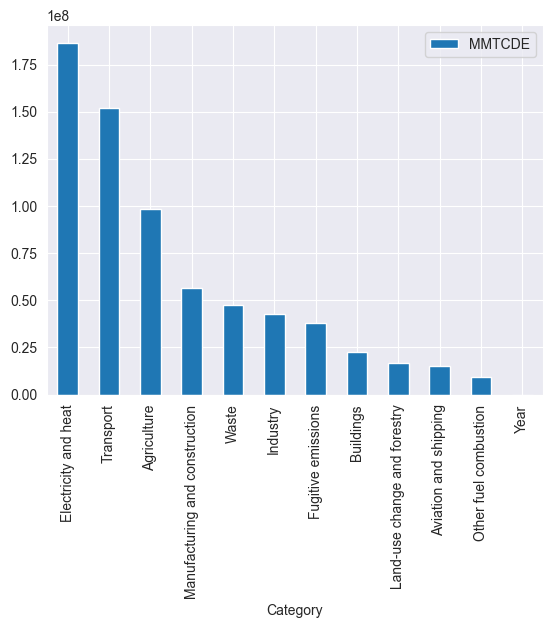

In [150]:
row_2019 = row_2019.rename(columns={"variable":"Category", "value":"MMTCDE"})
row_2019 = row_2019.sort_values(by=["MMTCDE"], ascending=False)
row_2019.plot.bar(x="Category", y="MMTCDE")

# Making a code for a new table for later.
    df_deaths = pd.read_csv("datasets/number-of-deaths-by-risk-factor.csv")
    df_deaths_mexico = df_deaths.query("Entity == 'Mexico'")
    df_deaths_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)
    df_deaths_mexico

In [151]:
df_fossil = pd.read_csv("datasets/fossil-fuels-share-energy.csv")
df_fossil.columns

Index(['Entity', 'Code', 'Year', 'Fossil fuels (% equivalent primary energy)'], dtype='object')

In [152]:
df_fossil = df_fossil.query("Entity == 'Mexico'")
df_fossil.drop(['Entity', 'Code'], axis=1, inplace=True)
df_fossil.head(2)

,Year,Fossil fuels (% equivalent primary energy)
2917,1965,91.065277
2918,1966,90.366890


In [153]:
df_fossil.pct_change()


,Year,Fossil fuels (% equivalent primary energy)
2917,NaN,NaN
2918,0.000509,-0.007669
2919,0.000509,-0.007284
2920,0.000508,-0.006148
2921,0.000508,0.004122
2922,0.000508,-0.005657
2923,0.000508,0.009425
2924,0.000507,0.004036
2925,0.000507,0.001460
2926,0.000507,0.006128


# TODO Clean pivot1 table. It's full of columns with more than 50% of NaN values and it affects the correlation maps.
